# 06 Comparisons of regions across other measures 

> Look out how the regions with under-diagnosis perform across other measures of dementia care and diagnosis

---

In [2]:
#|default_exp core.06_comparison_n_geoplots_dementia

In [3]:
#|export
import dementia_inequalities as proj
from dementia_inequalities import const, log, utils, tools
import adu_proj.utils as adutils

In [4]:
#|export
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm
import matplotlib.font_manager as fm

from scipy.stats import pearsonr, spearmanr

import geopandas as gpd

---

## Load autonomy style files and font 

In [5]:
# Define the font path and style path
FONT_PATH = const.raw_data_path + '/JosefinSans-Regular.ttf'
STYLEPATH = const.raw_data_path + '/autonomy_white.mplstyle'

# Add the font to the font manager
fm.fontManager.addfont(FONT_PATH)

# Set the font family for matplotlib to use
plt.rcParams['font.family'] = 'Josefin Sans'
plt.style.use(STYLEPATH)

# Inform the user that the font was set
print("Josefin Sans font set for Matplotlib.")
print("mplstyle activated.")

Josefin Sans font set for Matplotlib.
mplstyle activated.


-------

In [6]:
#|export 
df_reg_model = pd.read_csv(const.output_path+'/reg_model/reg_model_results.csv')
df_IMD_reg_model = pd.read_csv(const.output_path+'/test_set_reg_model/IMD_reg_model_results.csv')
df_log_norm_model = pd.read_csv(const.output_path+'/log_norm_model/log_norm_model_results.csv')
#df_GP_reg_model = pd.read_csv(const.output_path+'/test_set_reg_model/GP_reg_model_results.csv')
df_half_norm_model = pd.read_csv(const.output_path+'/half_norm_model/half_norm_model_results.csv')

In [7]:
# Load geojson files of LAD boundaries
gdf_LAD = gpd.read_file(const.data_path+'/LAD_area/LAD_Dec_2021_GB_BFC_2022_-8975151699474964544.geojson')
gdf_LAD = gdf_LAD.to_crs(epsg=3857)

### Merge results from the models into a single dataframe 

In [8]:
df_model_results = df_reg_model.copy()

# IMD training set
df_model_results['IMD_reg_model_residuals'] = df_IMD_reg_model['IMD_reg_model_residuals']
df_model_results['IMD_reg_model_pred'] = df_IMD_reg_model['IMD_reg_model_pred']

# add results of alternative error models 
# log normal model 
df_model_results['log_norm_diagnosis_gap'] = df_log_norm_model['diagnosis_gap']
df_model_results['log_norm_model_pred'] = df_log_norm_model['log_norm_model_pred']

df_model_results['half_norm_diagnosis_gap'] = df_half_norm_model['half_norm_diagnosis_gap']
df_model_results['half_norm_model_pred'] = df_half_norm_model['half_norm_model_pred']

In [9]:
# merge dataframes and tidy 
df = pd.merge(gdf_LAD, df_model_results, left_on='LAD21NM', right_on='area_name')
df.drop(columns='area_name', inplace=True)

### Create some custom colour maps

In [10]:
# Colours for pre-lim results 

# white -> boring green
colors = [(0, 'white'), (1, 'xkcd:boring green')]
cmap_custom0a = LinearSegmentedColormap.from_list('custom_cmap', colors)

# white -> windows blue
colors = [(0, 'white'), (1, 'xkcd:windows blue')]
cmap_custom0b = LinearSegmentedColormap.from_list('custom_cmap', colors)

# poop green -> white -> deep lilac
colors = [(0, 'xkcd:poop green'), (0.5, 'white'), (1, 'xkcd:deep lilac')]
cmap_custom1 = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Colours for PROPER results

# white -> carnation
colors = [(0, 'white'), (1, 'xkcd:carnation')]
cmap_custom2a = LinearSegmentedColormap.from_list('custom_cmap', colors)

# piss yellow -> white -> carnation
colors = [(0, 'xkcd:piss yellow'), (0.5, 'white'), (1, 'xkcd:carnation')]
cmap_custom2b = LinearSegmentedColormap.from_list('custom_cmap', colors)

# white -> lipstick red 
colors = [(0, 'white'), (1, 'xkcd:lipstick red')]
cmap_custom3 = LinearSegmentedColormap.from_list('custom_cmap', colors)

# orange -> piss yellow -> white 
colors = [(0, 'xkcd:pumpkin orange'), (0.5, 'xkcd:piss yellow'), (1, 'white')]
cmap_custom4 = LinearSegmentedColormap.from_list('custom_cmap', colors)

# white -> orange 
colors = [(0, 'white'), (1, 'xkcd:pumpkin orange')]
cmap_custom5a = LinearSegmentedColormap.from_list('custom_cmap', colors)

# white -> piss yellow
colors = [(0, 'white'), (1, 'xkcd:piss yellow')]
cmap_custom5b = LinearSegmentedColormap.from_list('custom_cmap', colors)

# lipstick red -> white -> orange
colors = [(0, 'xkcd:lipstick red'), (0.5, 'white'), (1, 'xkcd:pumpkin orange')]
cmap_custom6 = LinearSegmentedColormap.from_list('custom_cmap', colors)

# orange -> piss yellow -> white -> boring green -> poop green
colors = [(0, 'xkcd:orange'), (0.25, 'xkcd:piss yellow'), (0.5, 'white'), (0.75, 'xkcd:boring green'), (1, 'xkcd:poop green')]
cmap_custom7 = LinearSegmentedColormap.from_list('custom_cmap', colors)

### Start with a really basic plot showing the regional variation in dementia diagnosing 

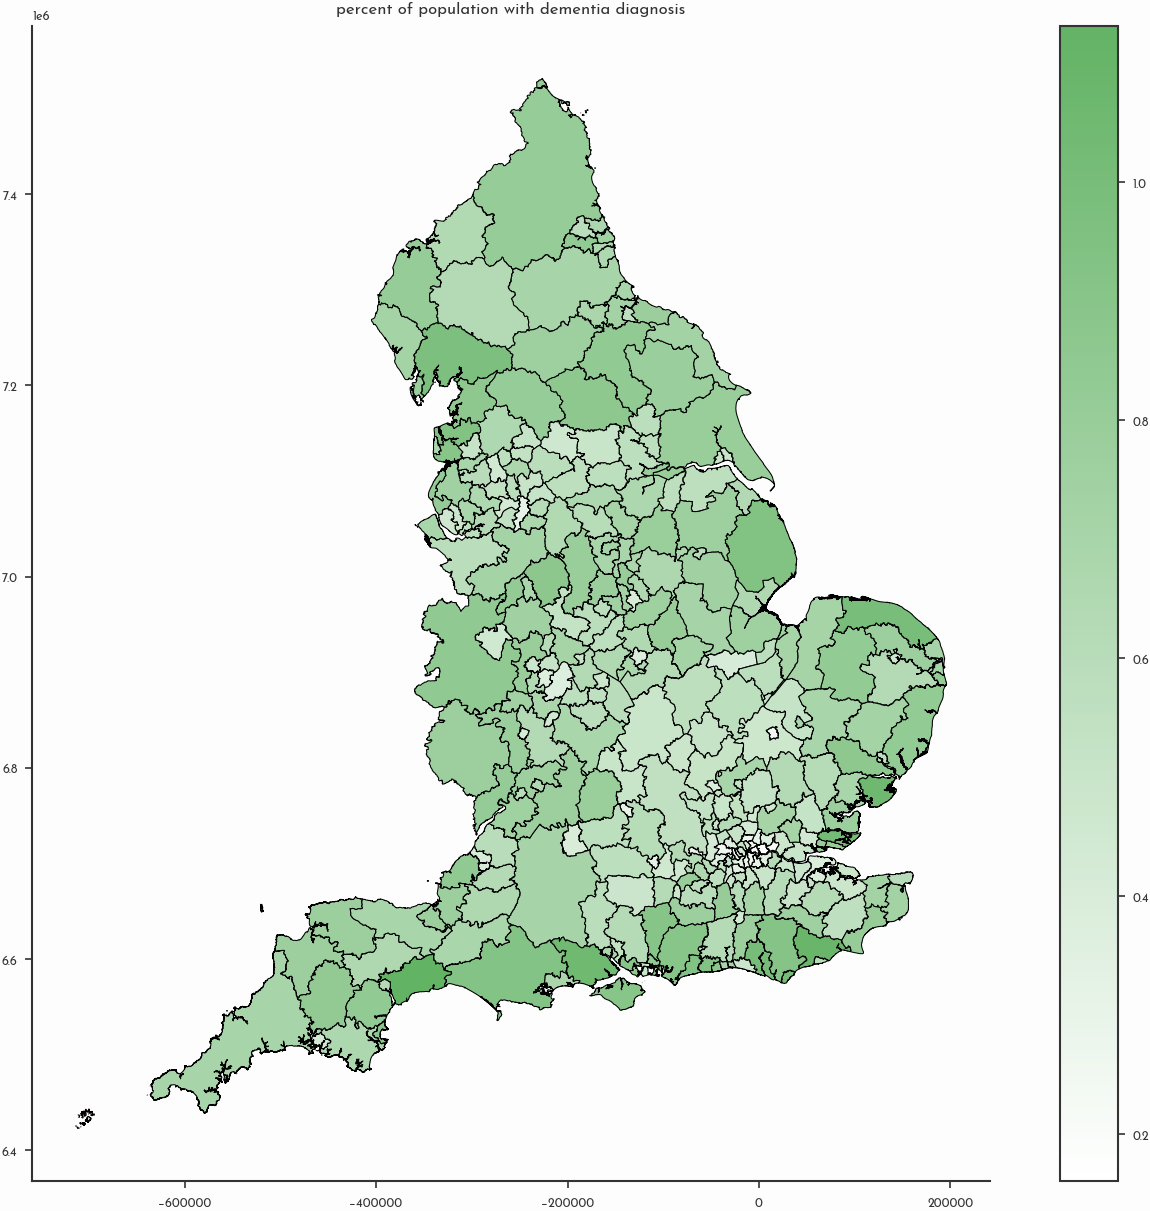

In [11]:
fig, ax = plt.subplots(figsize=(12,10))
df.plot(ax=ax, column='DEM_afflicted_pc', edgecolor='black', linewidth=0.5, alpha=1.0, cmap=cmap_custom0a, legend=True)
plt.title('percent of population with dementia diagnosis')
plt.show()

And also a plot to show the geographic variation in the density of GP doctors. 

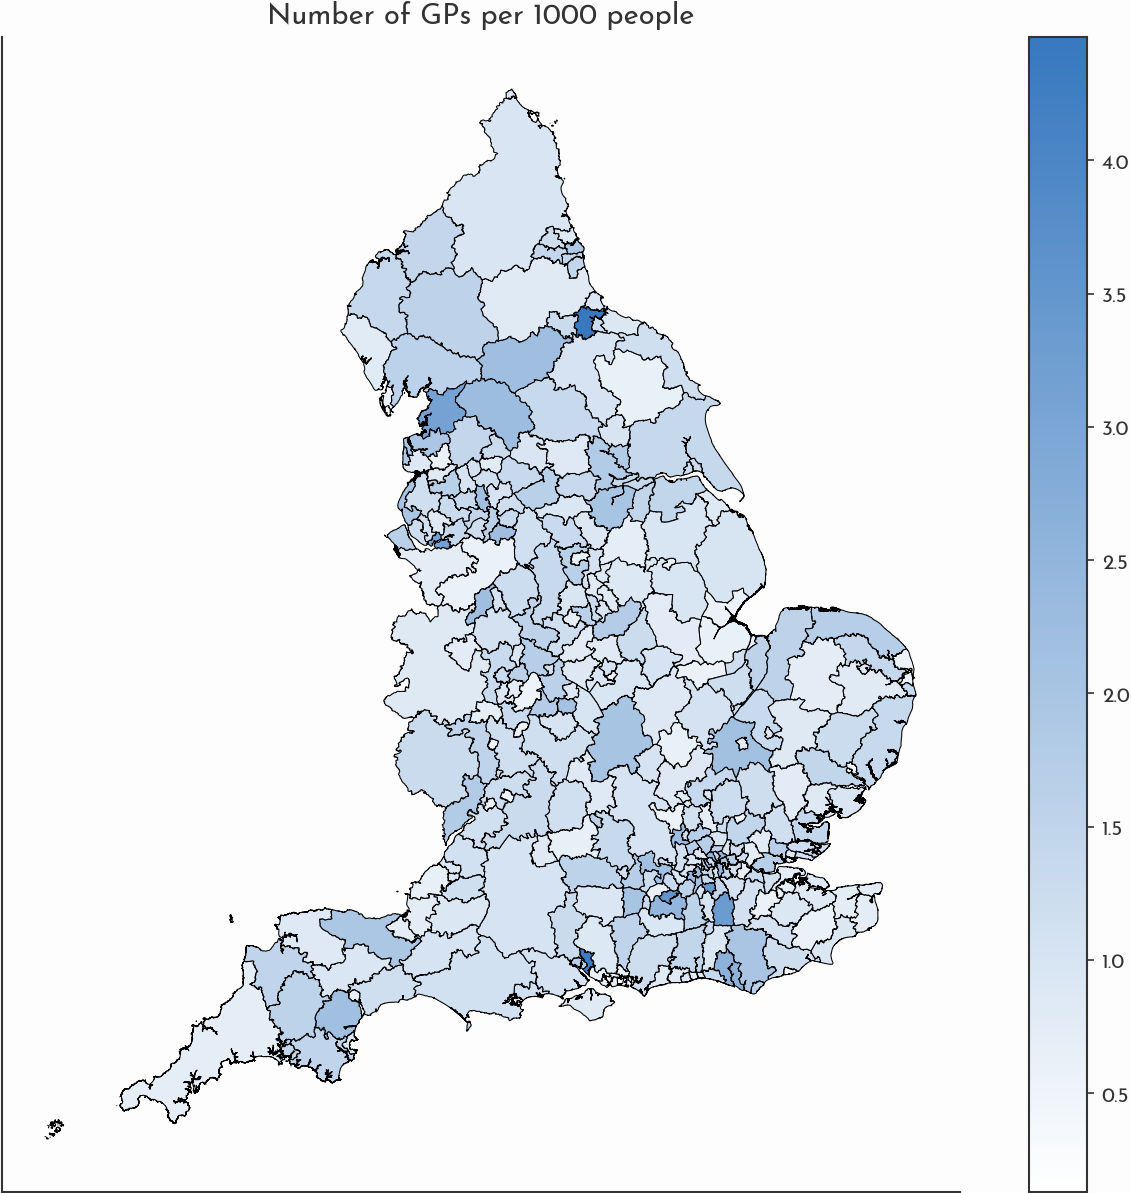

In [12]:
# add column with GPs per 1000 people
df['GP_per_1000'] = 1000*(df['GP_LAD_pc']/100)

# geoplot 
fig, ax = plt.subplots(figsize=(12,10))
df.plot(ax=ax, column='GP_per_1000', edgecolor='black', linewidth=0.5, alpha=1.0, cmap=cmap_custom0b, legend=True)
cb_ax = ax.figure.axes[1]
cb_ax.tick_params(labelsize=10)
plt.title('Number of GPs per 1000 people', size=14)
plt.yticks([])
plt.xticks([])

# save fig 
plt.savefig(const.figs_path+'/GPs_per_1000_map.png')

plt.show()

### Geopandas plot for the diagnosis gap according to the log normal model 

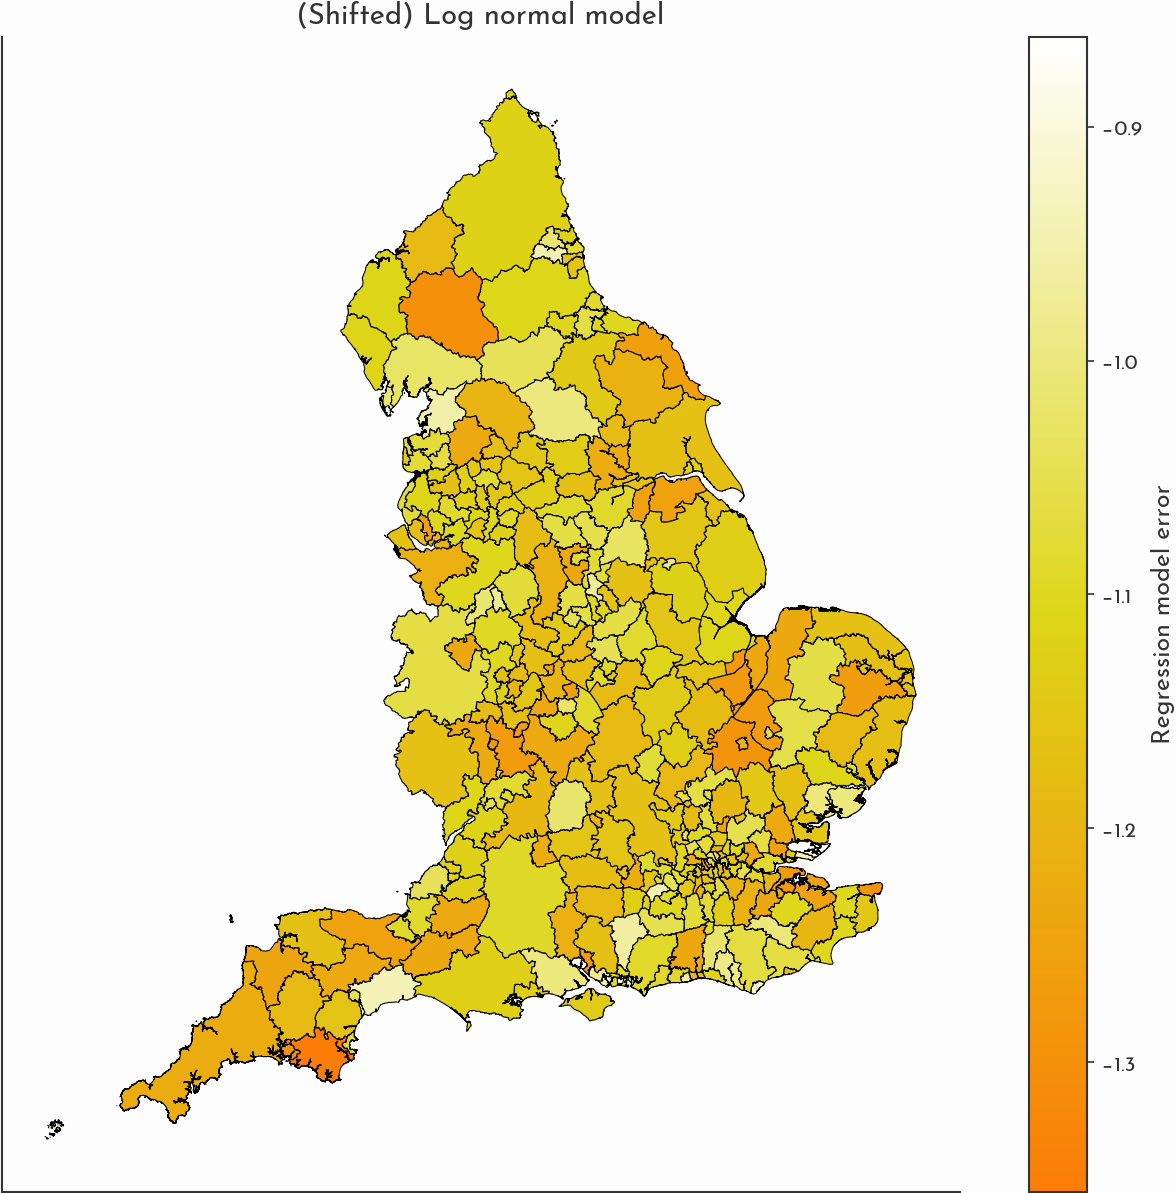

In [13]:
fig, ax = plt.subplots(figsize=(12,10))
df.plot(ax=ax, column='log_norm_diagnosis_gap', edgecolor='black', linewidth=0.5, alpha=1.0, cmap=cmap_custom4, legend=True)
plt.title('(Shifted) Log normal model', size=14)
cb_ax = ax.figure.axes[1]
cb_ax.set_ylabel('Regression model error', size=12)
cb_ax.tick_params(labelsize=10)
plt.yticks([])
plt.xticks([])
plt.savefig(const.figs_path+'/log_normal_map.png')
plt.show()

### Geopandas plot for the residuals of the multiple linear regression model 

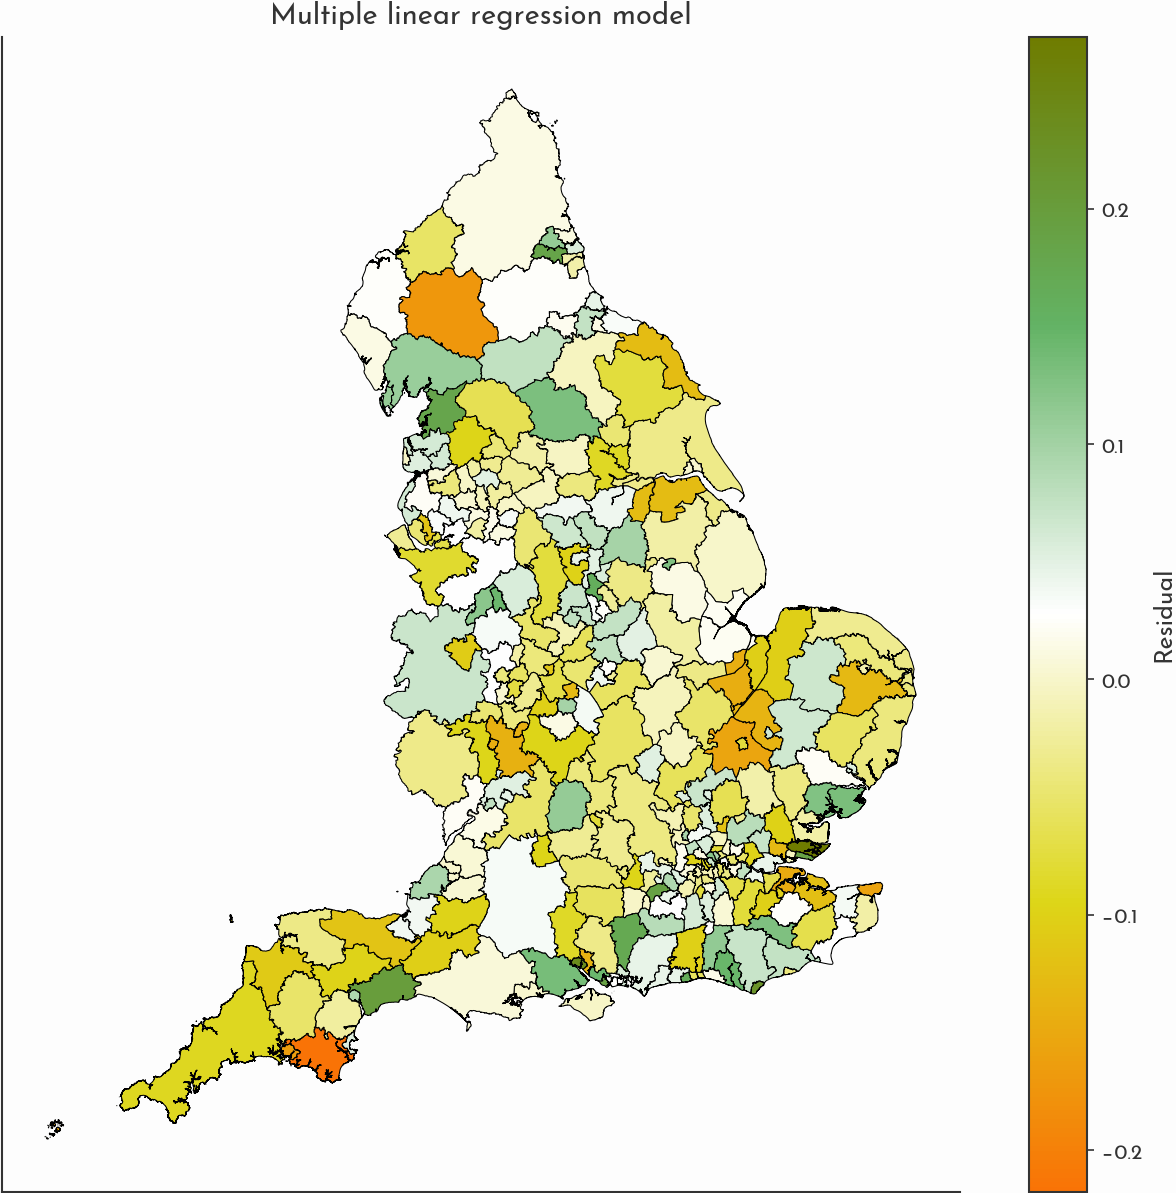

In [14]:
# Plotting the data
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting residuals
df.plot(ax=ax, column='reg_model_residuals', edgecolor='black', linewidth=0.5, alpha=1.0, cmap=cmap_custom7, legend=True)
cb_ax = ax.figure.axes[1]
cb_ax.set_ylabel('Residual', size=12)
cb_ax.tick_params(labelsize=10)
plt.title('Multiple linear regression model', size=14)
plt.yticks([])
plt.xticks([])

plt.show()

### Residuals of the IMD model
Geopandas plot of the residuals of the multiple linear regression model trained on the least deprived regions (according to the IMD)

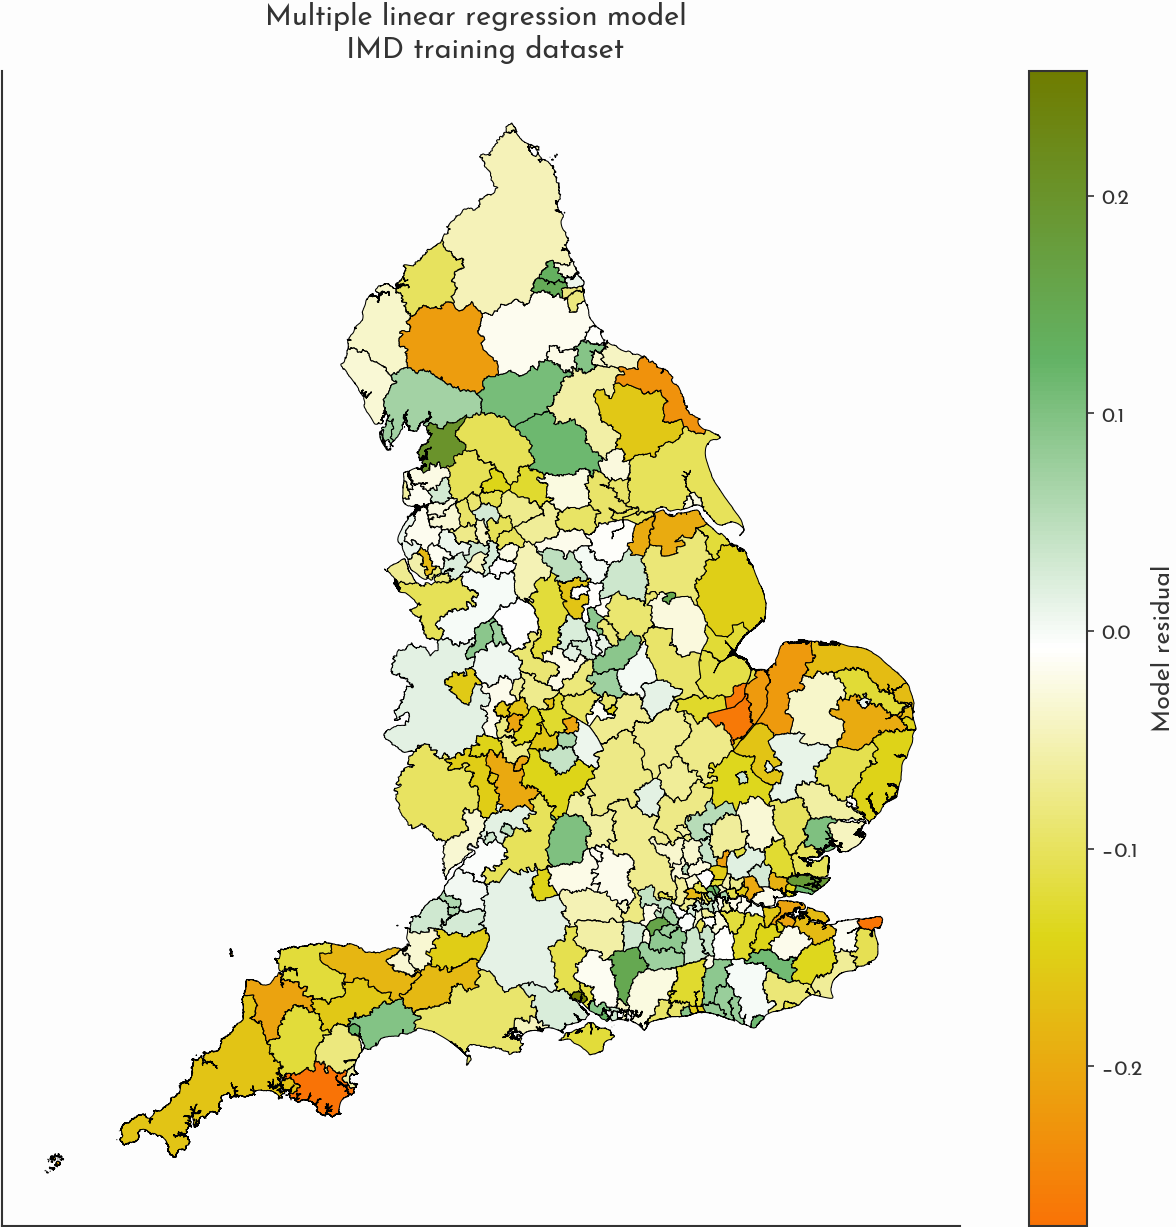

In [15]:
# Plotting the data
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting residuals
df.plot(ax=ax, column='IMD_reg_model_residuals', edgecolor='black', linewidth=0.5, alpha=1.0, cmap=cmap_custom7, legend=True)

# Create custom colorbar
# alt_norm = TwoSlopeNorm(vmin=-0.4, vcenter=0, vmax=0.4)
# cbar = plt.cm.ScalarMappable(cmap=cmap_custom7, norm=alt_norm)
# cbar.set_array([])
# plt.colorbar(cbar, ax=ax, orientation='vertical', label='Residuals')
cb_ax = ax.figure.axes[1]
cb_ax.set_ylabel('Model residual', size=12)
cb_ax.tick_params(labelsize=10)
plt.yticks([])
plt.xticks([])
plt.title('Multiple linear regression model \n IMD training dataset', size=14)
plt.savefig(const.figs_path+'/residual_map_IMD_data')
plt.show()

## Plot the areas with worst underdiagnosing 

In [16]:
N = 20
bottom_N = df.iloc[np.argsort(df['reg_model_residuals'].values)[:N]]['LAD21NM'].reset_index()
bottom_N.drop(columns='index', inplace=True)
bottom_N.columns = ['regression_model']

bottom_N['regression_model_IMD'] = df.iloc[np.argsort(df['IMD_reg_model_residuals'].values)[:N]]['LAD21NM'].values
bottom_N['log_norm_model'] = df.iloc[np.argsort(df['log_norm_diagnosis_gap'].values)[:N]]['LAD21NM'].values

bottom_N.columns = ['Regression model', 'Regression model (IMD trained)', 'Log normal model']
bottom_N

,Regression model,Regression model (IMD trained),Log normal model
0,South Hams,South Hams,South Hams
1,Eden,Thanet,Eden
2,Plymouth,Fenland,Plymouth
3,Thanet,Scarborough,Thanet
4,South Cambridgeshire,King's Lynn and West Norfolk,South Cambridgeshire
5,Isles of Scilly,Eden,Eastleigh
6,Medway,Broxbourne,Medway
7,Worcester,Medway,Isles of Scilly
8,Fenland,Torridge,Worcester
9,Redditch,Nuneaton and Bedworth,Fenland


In [17]:
# Create new columns recording 1 if regions in bottom 50 for underdiganosis, and 0 otherwise
reg_worst_50 = np.argsort(df['reg_model_residuals'].values)[:50]
log_norm_worst_50 = np.argsort(df['log_norm_diagnosis_gap'].values)[:50]
joint_underdiagnosing = set(reg_worst_50).intersection(set(log_norm_worst_50))

df['reg_model_residuals_worst50'] = np.zeros(len(df))
df['log_norm_diagnosis_gap_worst50'] = np.zeros(len(df))
df['underdiagnosing'] = np.zeros(len(df))

for x in reg_worst_50: 
    df.at[x, 'reg_model_residuals_worst50'] = 1

for x in log_norm_worst_50:
    df.at[x, 'log_norm_diagnosis_gap_worst50'] = 1

for x in joint_underdiagnosing:
    df.at[x, 'underdiagnosing'] = 1

In [18]:
len(joint_underdiagnosing)

49

### and now plot what these regions look like 

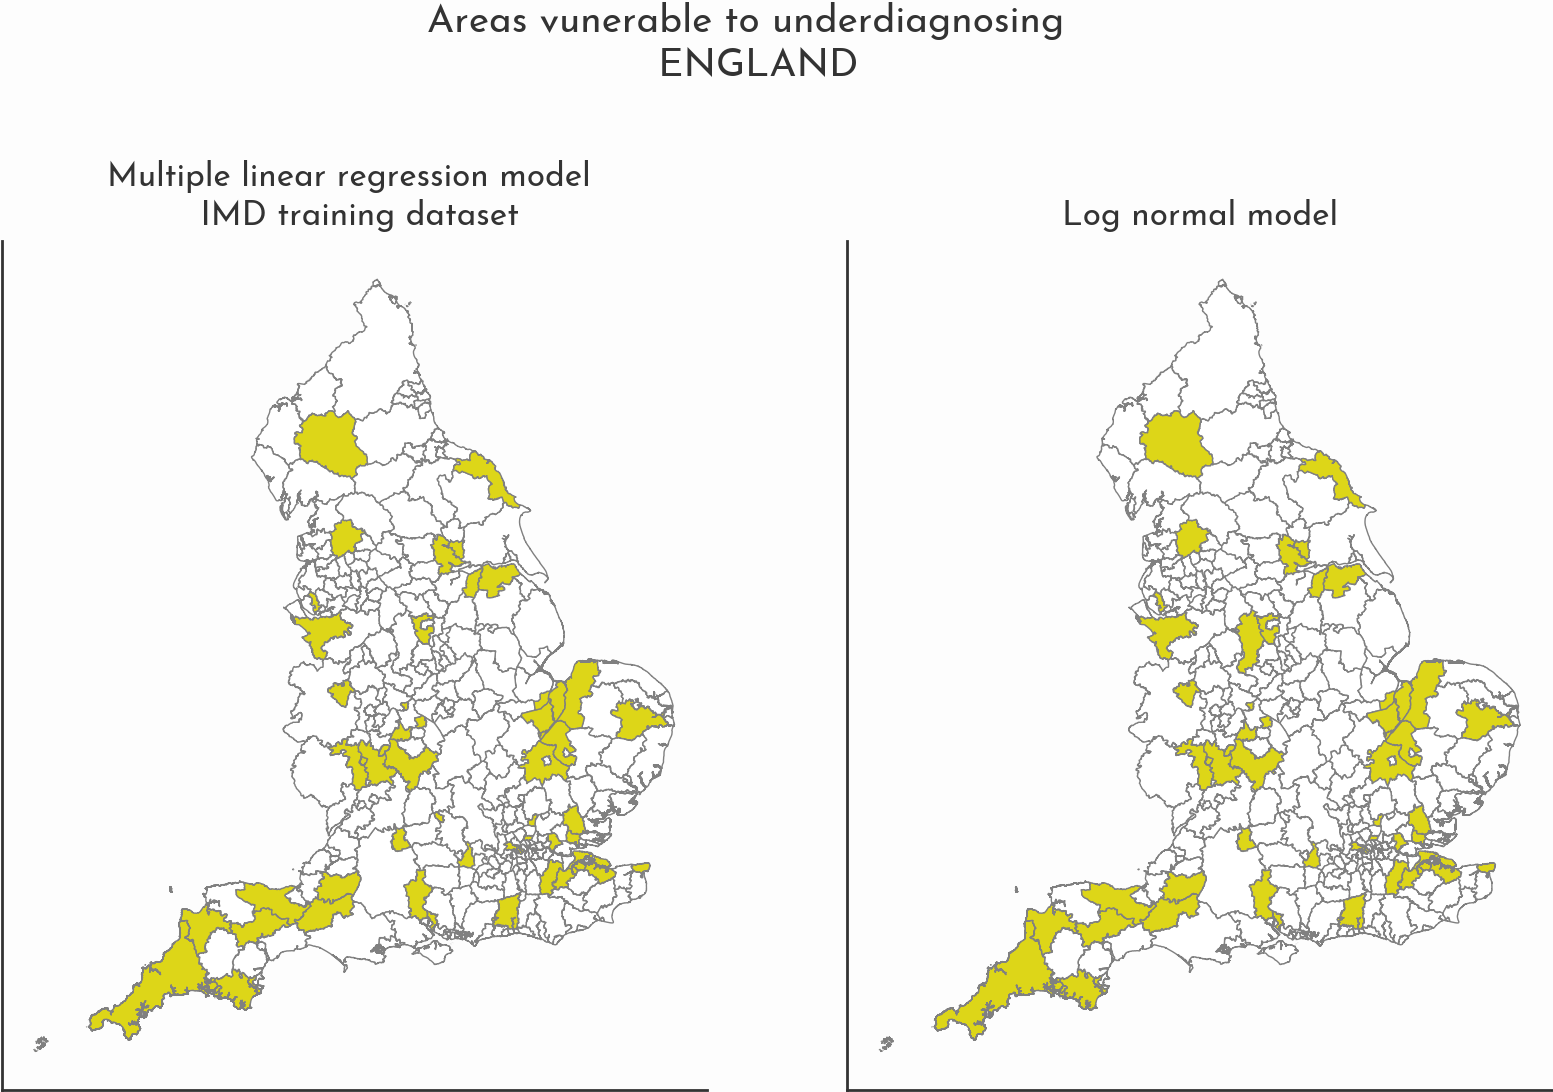

In [19]:
# Plotting the data
fig = plt.figure(figsize = (10,6), dpi=200)

# Plotting residuals
ax1 = fig.add_subplot(121)
df.plot(ax=ax1, column='reg_model_residuals_worst50', edgecolor='grey', linewidth=0.5, alpha=1.0, cmap=cmap_custom5b, legend=False)
plt.yticks([])
plt.xticks([])
plt.title('Multiple linear regression model \n IMD training dataset', size=12)

# Plotting residuals
ax2 = fig.add_subplot(122)
df.plot(ax=ax2, column='log_norm_diagnosis_gap_worst50', edgecolor='grey', linewidth=0.5, alpha=1.0, cmap=cmap_custom5b, legend=False)
plt.yticks([])
plt.xticks([])

plt.title('Log normal model', size=12)

fig.suptitle('Areas vunerable to underdiagnosing \n ENGLAND', size=14, verticalalignment='bottom', weight='demi')

plt.savefig(const.figs_path+'/underdiagnosis_comaprison.png')
plt.show()

In [20]:
london_boroughs = [
    "Barking and Dagenham",
    "Barnet",
    "Bexley",
    "Brent",
    "Bromley",
    "Camden",
    "Croydon",
    "Ealing",
    "Enfield",
    "Greenwich",
    "Hackney",
    "Hammersmith and Fulham",
    "Haringey",
    "Harrow",
    "Havering",
    "Hillingdon",
    "Hounslow",
    "Islington",
    "Kensington and Chelsea",
    "Kingston upon Thames",
    "Lambeth",
    "Lewisham",
    "Merton",
    "Newham",
    "Redbridge",
    "Richmond upon Thames",
    "Southwark",
    "Sutton",
    "Tower Hamlets",
    "Waltham Forest",
    "Wandsworth",
    "Westminster"
]

In [21]:
df_London = df[df['LAD21NM'].isin(london_boroughs)]
df_London

,OBJECTID,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,...,IMD_reg_model_residuals,IMD_reg_model_pred,log_norm_diagnosis_gap,log_norm_model_pred,half_norm_diagnosis_gap,half_norm_model_pred,GP_per_1000,reg_model_residuals_worst50,log_norm_diagnosis_gap_worst50,underdiagnosing
277,278,E09000002,Barking and Dagenham,,547757,185111,0.129479,51.54555,328f185c-c5ef-446c-9519-aa83177d524d,"MULTIPOLYGON (((7722.468 6717129.291, 7735.388...",...,-0.161108,0.401396,-1.178766,1.419054,-0.038386,0.278673,1.186481,0.0,0.0,0.0
278,279,E09000003,Barnet,,523473,191752,-0.218190,51.61107,81f2f1e6-d68f-41c7-80fd-c8aef7eb4870,"POLYGON ((-22249.634 6740706.313, -22227.798 6...",...,-0.006549,0.522666,-1.073025,1.589142,0.090737,0.425380,1.700765,0.0,0.0,0.0
279,280,E09000004,Bexley,,549202,175434,0.146212,51.45822,b093597c-1bdc-409d-b1e8-cc502c9c4a69,"MULTIPOLYGON (((22152.806 6702733.239, 22141.3...",...,-0.016534,0.635045,-1.055688,1.674199,0.137905,0.480606,0.692799,0.0,0.0,0.0
280,281,E09000005,Brent,,519615,186465,-0.275680,51.56438,a470b107-725f-47a2-a339-d0a5a6bb505a,"POLYGON ((-29479.511 6727810.443, -29466.763 6...",...,-0.111452,0.466319,-1.109898,1.464765,0.033914,0.320953,0.862449,0.0,0.0,0.0
281,282,E09000006,Bromley,,542036,165707,0.039246,51.37266,44579be8-03df-4e38-9c38-379ce1a5e99f,"POLYGON ((3405.056 6700268.360, 3409.753 67002...",...,-0.119390,0.624474,-1.204307,1.709391,-0.013271,0.518355,1.079731,0.0,0.0,0.0
282,283,E09000007,Camden,,527491,184283,-0.162910,51.54305,8a088a35-2a55-4a42-8be6-01a31cbac879,"POLYGON ((-18477.263 6723236.395, -18467.156 6...",...,0.131196,0.401948,-1.018078,1.551222,0.120590,0.412554,2.554856,0.0,0.0,0.0
283,284,E09000008,Croydon,,533922,164744,-0.077610,51.36597,31d1741d-e4ae-43e8-aa78-ceb50bd62b7d,"POLYGON ((-12396.650 6696491.454, -12348.680 6...",...,-0.027371,0.534964,-1.068147,1.575740,0.098438,0.409155,1.414232,0.0,0.0,0.0
284,285,E09000009,Ealing,,517055,181959,-0.314100,51.52442,2cd4f9d2-5a5f-4fed-a1e8-896e7688db59,"POLYGON ((-38464.061 6720675.151, -38461.990 6...",...,-0.181401,0.439074,-1.222074,1.479747,-0.081704,0.339377,0.950430,1.0,1.0,1.0
285,286,E09000010,Enfield,,532831,196198,-0.081440,51.64889,54492dc9-2e90-43e3-be30-386eaeaba4dc,"POLYGON ((-10782.681 6744365.929, -10758.884 6...",...,-0.153269,0.591565,-1.137883,1.576178,0.037895,0.400401,1.001887,0.0,0.0,0.0
286,287,E09000011,Greenwich,,542507,175878,0.050093,51.46394,6399be80-8cd6-4616-b499-a60188855c66,"MULTIPOLYGON (((-2732.193 6707638.581, -2716.8...",...,-0.019058,0.374580,-1.114453,1.469975,0.018646,0.336876,1.144185,0.0,0.0,0.0


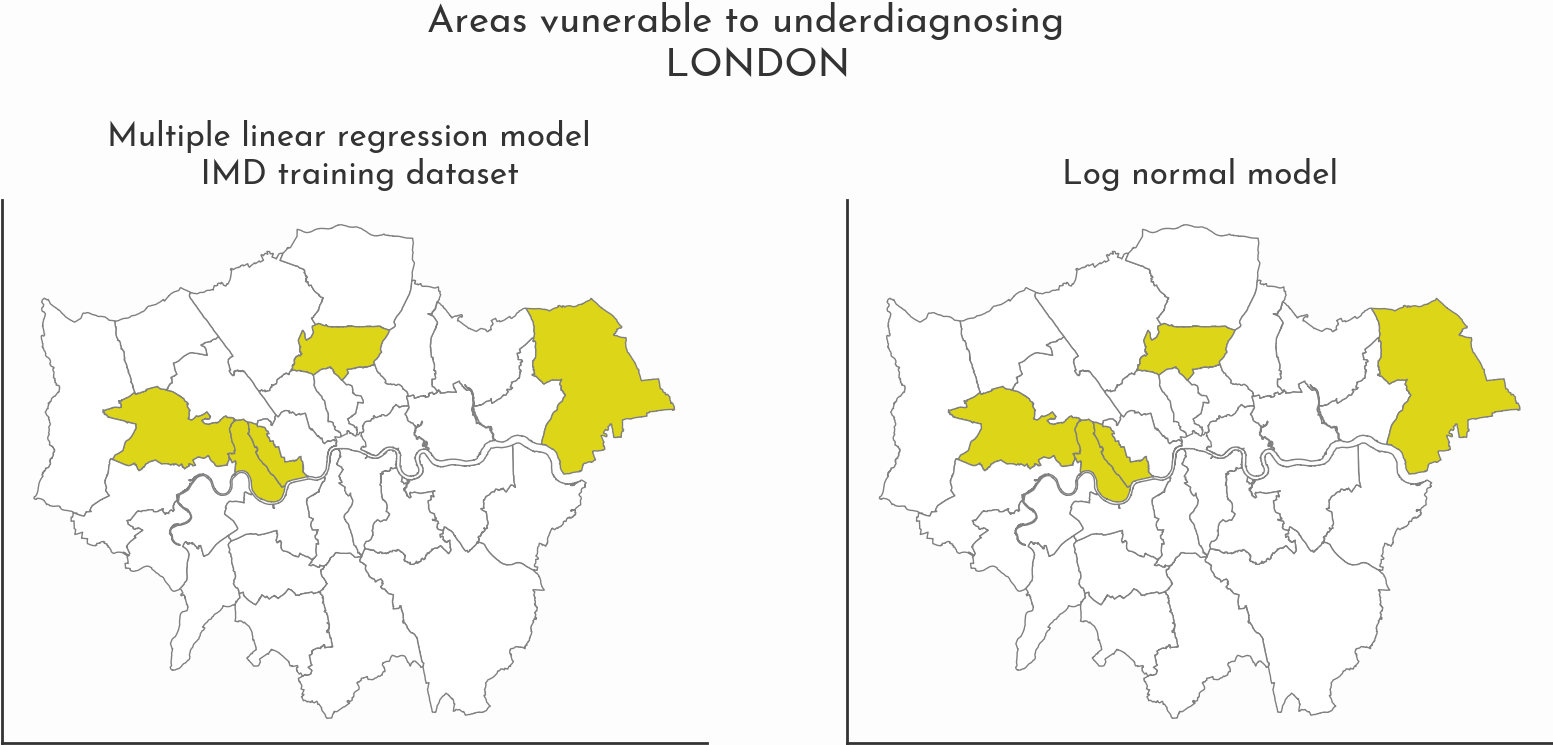

In [22]:
# create dataframe of London regions 
df_London = df[df['LAD21NM'].isin(london_boroughs)]

# Plotting the data
fig = plt.figure(figsize = (10,4), dpi=200)

# Plotting IMD regression
ax1 = fig.add_subplot(121)
df_London.plot(ax=ax1, column='reg_model_residuals_worst50', edgecolor='grey', linewidth=0.5, alpha=1.0, cmap=cmap_custom5b, legend=False)
plt.yticks([])
plt.xticks([])
plt.title('Multiple linear regression model \n IMD training dataset', size=12)

# Add labels for London districts
# df_London_to_label = df_London[df_London['reg_model_residuals_worst50']==1]
# for _, row in df_London_to_label.iterrows():
#     plt.annotate(row['LAD21NM'], (row.geometry.centroid.x, row.geometry.centroid.y), fontsize=8, ha='center', color='black')

# Plotting log normal 
ax2 = fig.add_subplot(122)
df_London.plot(ax=ax2, column='log_norm_diagnosis_gap_worst50', edgecolor='grey', linewidth=0.5, alpha=1.0, cmap=cmap_custom5b, legend=False)
plt.yticks([])
plt.xticks([])
plt.title('Log normal model', size=12)

# Add labels for London districts
# df_London_to_label = df_London[df_London['log_norm_diagnosis_gap_worst50']==1]
# for _, row in df_London_to_label.iterrows():
#     plt.annotate(row['LAD21NM'], (row.geometry.centroid.x, row.geometry.centroid.y), fontsize=8, ha='center', color='black')

fig.suptitle('Areas vunerable to underdiagnosing \n LONDON', size=14, verticalalignment='bottom', weight='demi')

plt.savefig(const.figs_path+'/underdiagnosis_comaprison_London.png')
plt.show()

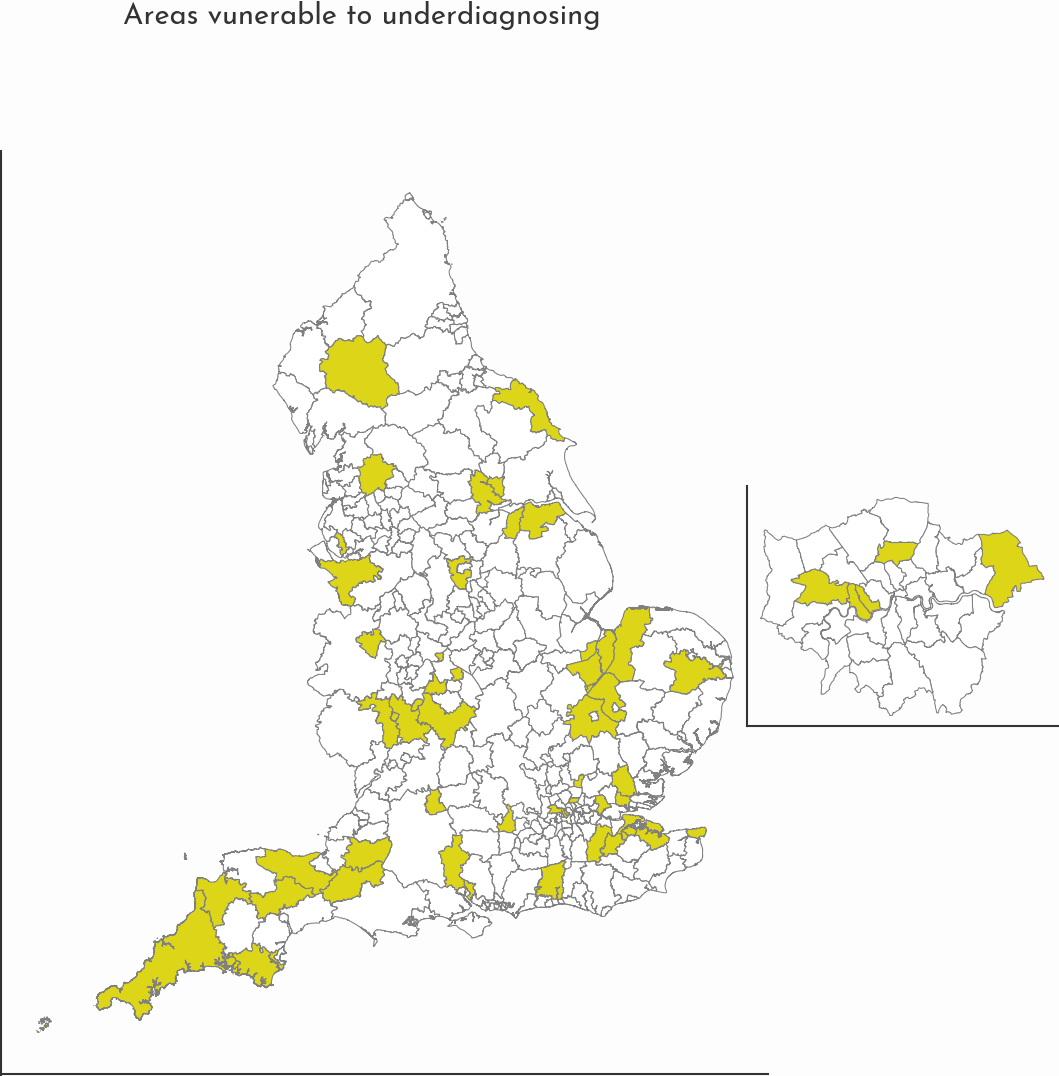

In [23]:
# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting England
df.plot(ax=ax, column='underdiagnosing', edgecolor='grey', linewidth=0.5, alpha=1.0, cmap=cmap_custom5b, legend=False)
plt.yticks([])
plt.xticks([])
#plt.title('Multiple linear regression model \n IMD training dataset', size=12)

# Plotting London

# Create a subplot for London with blown-up size
ax_london = fig.add_axes([0.7, 0.4, 0.2, 0.2])  # [left, bottom, width, height]\

df_London.plot(ax=ax_london, column='underdiagnosing', edgecolor='grey', linewidth=0.5, alpha=1.0, cmap=cmap_custom5b, legend=False)
plt.yticks([])
plt.xticks([])

# # Add labels for London districts
# df_London_to_label = df_London[df_London['underdiagnosing']==1]
# for _, row in df_London_to_label.iterrows():
#     plt.annotate(row['LAD21NM'], (row.geometry.centroid.x, row.geometry.centroid.y), fontsize=6, ha='center', color='black')

fig.suptitle('Areas vunerable to underdiagnosing', size=14, verticalalignment='bottom', weight='demi')

plt.savefig(const.figs_path+'/England_plus_London.png')
plt.show()

## Statistics to compare the models 

* We compare the residuals across the models using Pearson R correlation coefficient.
* We look at how many regions overlap in the bottom 20 across models. 
* We look at how mnay regions overlap in the top 20 across models.  

In [24]:
df_model_resid = df_model_results[['reg_model_residuals', 'IMD_reg_model_residuals', 'log_norm_diagnosis_gap']]
labels = ['regression model', 'IMD regression model', 'log normal model']

### Calculate the PearsonR and SpearmanR correlation 

In both a correlation of 1 indicates that there is a strong positive linear relationship. A correlation of -1 indicates there is a strong negative linear relationship.

In [25]:
n = len(df_model_resid.columns)
pearsonr_matrix = np.zeros((n, n))
spearmanr_matrix = np.zeros((n, n))
for i, col_i in enumerate(df_model_resid.columns):
    for j, col_j in enumerate(df_model_resid.columns):
        pearsonr_matrix[i,j] = pearsonr(df_model_resid[col_i], df_model_resid[col_j])[0]
        spearmanr_matrix[i,j] = spearmanr(df_model_resid[col_i], df_model_resid[col_j])[0]

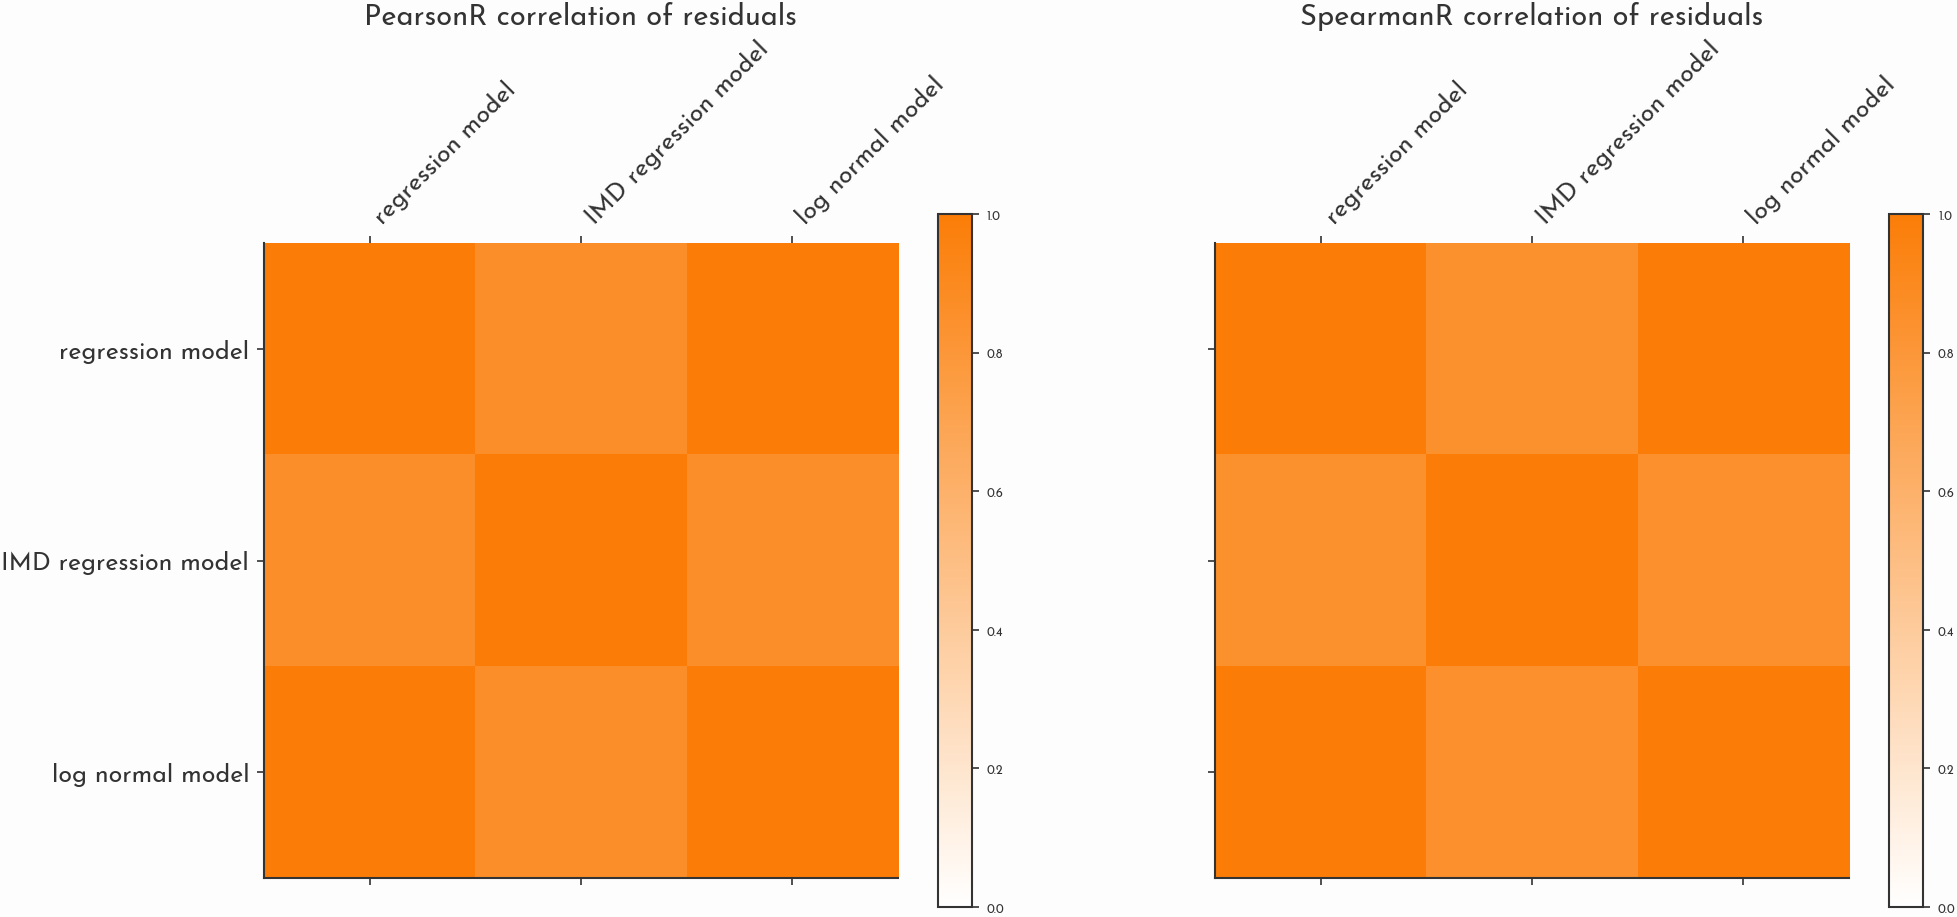

In [26]:
fig = plt.figure(figsize = (15,6))

#plt.subplot(1, 2, 1)
ax1 = fig.add_subplot(121)
cax = ax1.matshow(pearsonr_matrix, cmap=cmap_custom5a, vmin=0, vmax=1)
fig.colorbar(cax)

xaxis = np.arange(len(df_model_resid.columns))
ax1.set_xticks(xaxis)
ax1.set_yticks(xaxis)
plt.xticks(rotation=45, ha='left')
ax1.set_xticklabels(labels, size=12)
ax1.set_yticklabels(labels, size=12)
ax1.set_title('PearsonR correlation of residuals', size=14)

#plt.subplot(1, 2, 2)
ax2 = fig.add_subplot(122)
cax = ax2.matshow(spearmanr_matrix, cmap=cmap_custom5a, vmin=0, vmax=1)
fig.colorbar(cax)

xaxis = np.arange(len(df_model_resid.columns))
ax2.set_xticks(xaxis)
ax2.set_yticks(xaxis)
plt.xticks(rotation=45, ha='left')
ax2.set_xticklabels(labels, size=12)
ax2.set_yticklabels([])
ax2.set_title('SpearmanR correlation of residuals', size=14)

plt.savefig(const.figs_path+'/pearson_spearman.png')
plt.show()

## Calculate how many areas in common amongst the N most underdiagnosing regions 

In [27]:
n = len(bottom_N.columns)
intersection_matrix = np.zeros((n, n))
for i, col_i in enumerate(bottom_N.columns):
    for j, col_j in enumerate(bottom_N.columns):
        A = set(bottom_N[col_i].values.flatten())
        B = set(bottom_N[col_j].values.flatten())  
        intersection_matrix[i,j] = len(A.intersection(B))

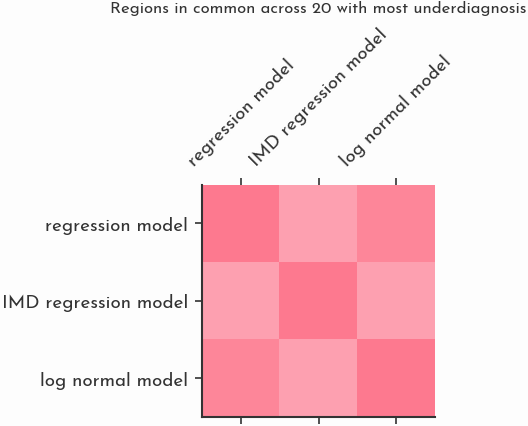

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(intersection_matrix, interpolation='nearest', cmap=cmap_custom2a, vmin=0, vmax=20)
xaxis = np.arange(len(df_model_resid.columns))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.tick_params(axis='x', rotation=45)
ax.set_xticklabels(labels, size=9)
ax.set_yticklabels(labels, size=9)
ax.set_title('Regions in common across 20 with most underdiagnosis')

plt.show()

## Calculate the standard deviation and MAE between of paired models residuals. 
Here we first normalise the residuals to then compare. 

In [29]:
df_model_resid_norm = df_model_resid.copy()

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

df_model_resid_norm['reg_model_residuals'] = NormalizeData(-df_model_resid['reg_model_residuals'].values)
df_model_resid_norm['IMD_reg_model_residuals'] = NormalizeData(-df_model_resid['IMD_reg_model_residuals'].values)

In [30]:
n = len(df_model_resid_norm.columns)
std_resid_matrix = np.zeros((n, n))
abs_mean_resid_matrix = np.zeros((n, n))
for i, col_i in enumerate(df_model_resid_norm.columns):
    for j, col_j in enumerate(df_model_resid_norm.columns):
        std_resid_matrix[i,j] = np.std(df_model_resid_norm[col_i] - df_model_resid_norm[col_j])
        abs_mean_resid_matrix[i,j] = np.mean(np.abs(df_model_resid_norm[col_i] - df_model_resid_norm[col_j]))

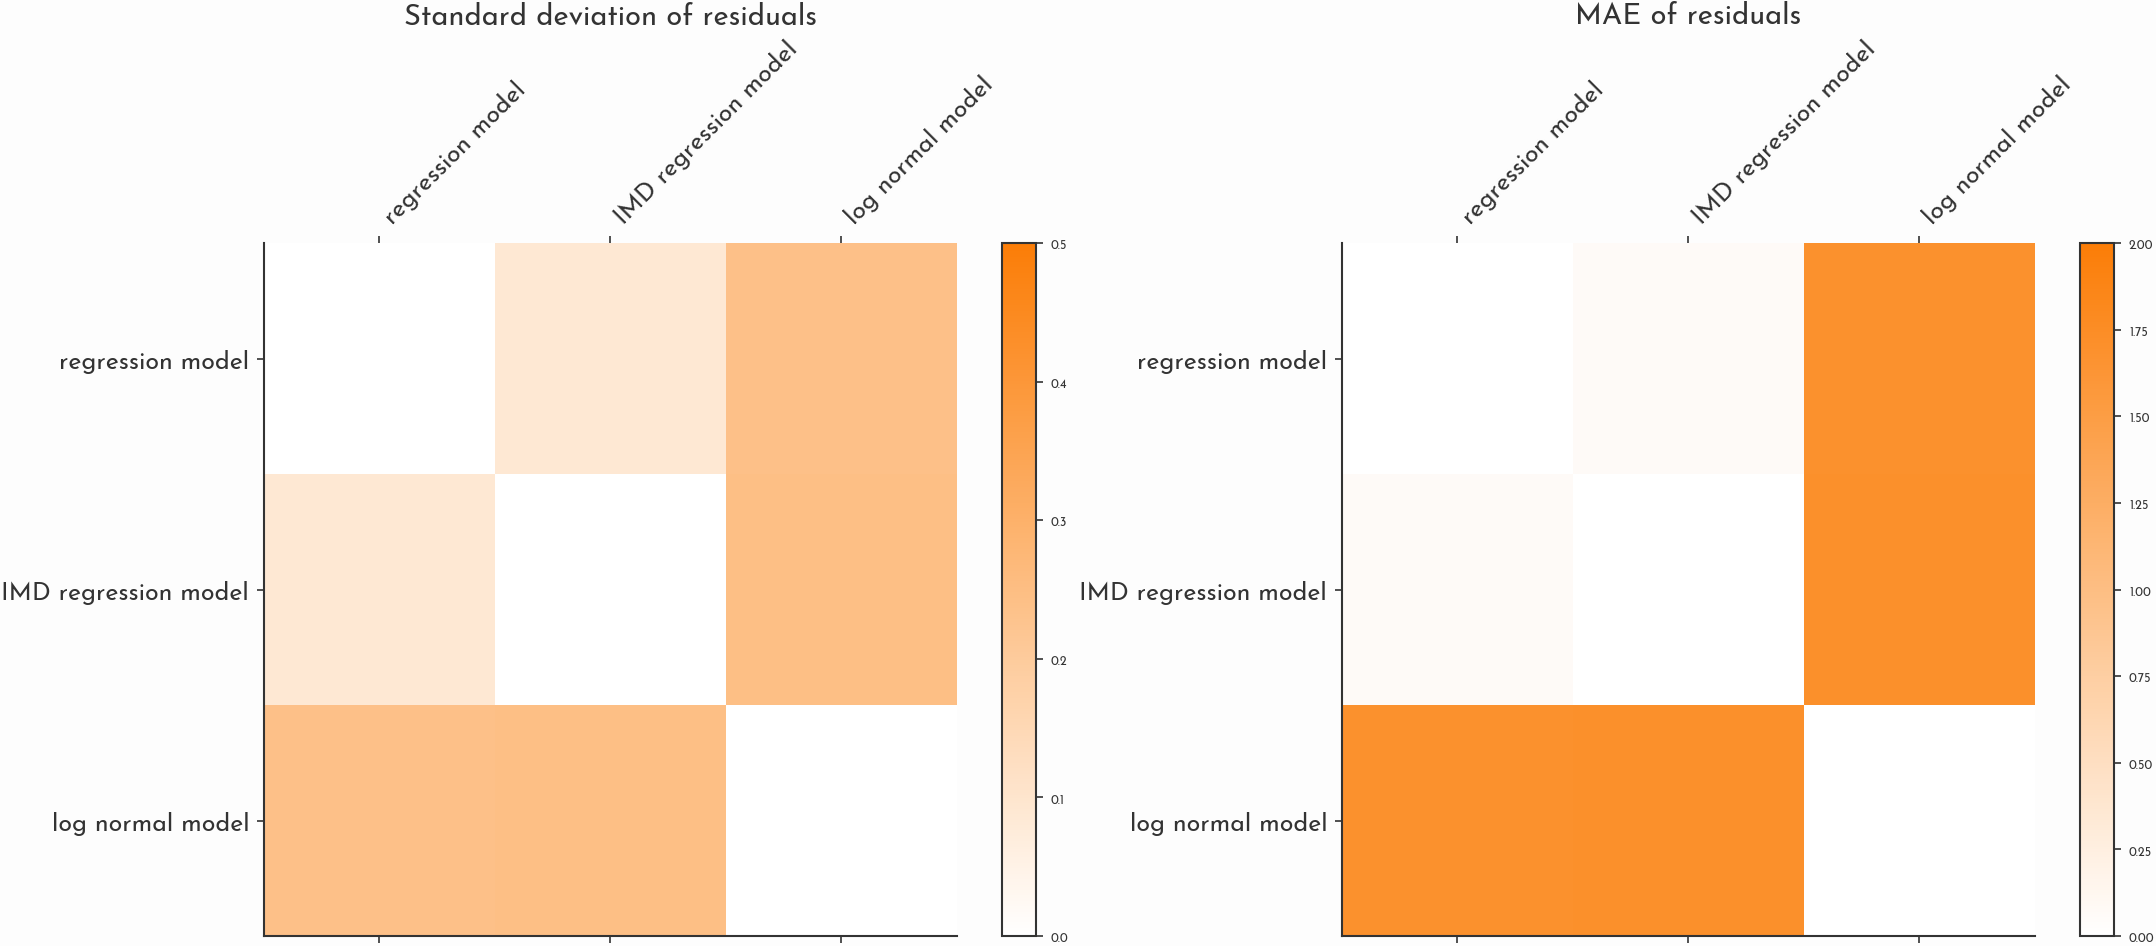

In [31]:
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,6))
fig = plt.figure(figsize = (17,6))

#plt.subplot(1, 2, 1)
ax1 = fig.add_subplot(121)
cax = ax1.matshow(std_resid_matrix, cmap=cmap_custom5a, vmin=0, vmax=0.5)
fig.colorbar(cax)

xaxis = np.arange(len(df_model_resid.columns))
ax1.set_xticks(xaxis)
ax1.set_yticks(xaxis)
plt.xticks(rotation=45, ha='left')
ax1.set_xticklabels(labels, size=12)
ax1.set_yticklabels(labels, size=12)
ax1.set_title('Standard deviation of residuals', size=14)


#plt.subplot(1, 2, 2)
ax2 = fig.add_subplot(122)
cax = ax2.matshow(abs_mean_resid_matrix, cmap=cmap_custom5a, vmin=0, vmax=2)
fig.colorbar(cax)

xaxis = np.arange(len(df_model_resid.columns))
ax2.set_xticks(xaxis)
ax2.set_yticks(xaxis)
plt.xticks(rotation=45, ha='left')
ax2.set_xticklabels(labels, size=12)
ax2.set_yticklabels(labels, size=12)
ax2.set_title('MAE of residuals', size=14)

plt.savefig(const.figs_path+'/deviation_mae_residuals.png')

plt.show()

### ...I actually think this is rarely done 

Instead, compare the MAE and standard deviation of the residuals with just the raw figures:

In [33]:
np.std(df_model_resid)

/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


reg_model_residuals        0.079048
IMD_reg_model_residuals    0.091940
log_norm_diagnosis_gap     0.079181
dtype: float64

In [37]:
np.abs(df_model_resid).apply(np.mean)

reg_model_residuals        0.062163
IMD_reg_model_residuals    0.082467
log_norm_diagnosis_gap     1.130503
dtype: float64